In [1]:
import arviz as az
import bambi as bmb
import numpy as np
import pandas as pd

In [13]:
#from collections import combination

items = ["a","b"]
sets = np.random.choice(items,10)



In [14]:
sets

array(['a', 'a', 'b', 'a', 'b', 'b', 'a', 'b', 'a', 'a'], dtype='<U1')

       Formula: Reaction ~ Days
        Family: gaussian
          Link: mu = identity
  Observations: 180
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 298.5079, sigma: 261.0092)
            Days ~ Normal(mu: 0.0, sigma: 48.8915)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 56.1721)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Reaction_sigma, Intercept, Days]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'Days'}>,
        <AxesSubplot:title={'center':'Days'}>],
       [<AxesSubplot:title={'center':'Reaction_sigma'}>,
        <AxesSubplot:title={'center':'Reaction_sigma'}>]], dtype=object)

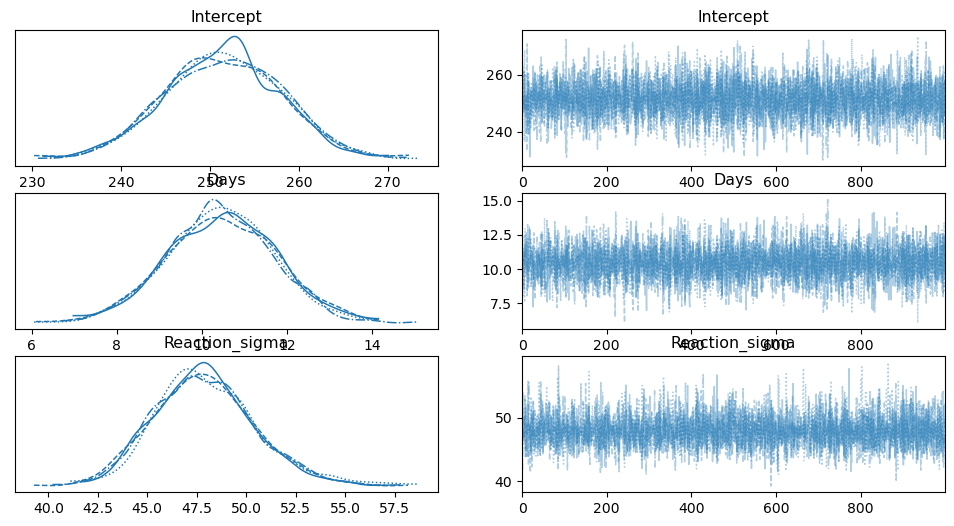

In [2]:
# Read in a dataset from the package content
data = bmb.load_data("sleepstudy")

# See first rows
data.head()
 
# Initialize the fixed effects only model
model = bmb.Model('Reaction ~ Days', data)

# Get model description
print(model)

# Fit the model using 1000 on each chain
results = model.fit(draws=1000)

# Key summary and diagnostic info on the model parameters
az.summary(results)

# Use ArviZ to plot the results
az.plot_trace(results)

In [3]:
data = pd.DataFrame({
    "g": np.random.choice(["Yes", "No"], size=50),
    "x1": np.random.normal(size=50),
    "x2": np.random.normal(size=50)
})

In [4]:
model = bmb.Model("g['Yes'] ~ x1 + x2", data, family="bernoulli")
fitted = model.fit()

Modeling the probability that g==Yes
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, x1, x2]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
